In [ ]:
R.version.string

##Instalando pacotes e carregando os dados

In [ ]:
# Pacotes necessarios - instalação
install.packages('tidyverse') #manipulação de dados
install.packages('ggplot2') #visualização
install.packages('cowplot') #visualização - unir gráficos
install.packages('caret') #modelos estatísticos
install.packages('corrplot') #matriz de correlação

In [ ]:
# chamando os pacotes já instalados
library(caret)
library(tidyverse)
library(ggplot2)
library(cowplot)
library(corrplot)


In [ ]:
#carregando dados para o Data Frame (dados)
dados <- read.csv("VIVO_CHURN.csv", stringsAsFactors = T)

In [ ]:
#visualização dos dados
glimpse(dados)
summary(dados)

## Pré-Processamento de dados

In [ ]:
# Verificando se há dados faltantes e retirar
colSums(is.na(dados)) #se nulo


customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [ ]:
dados_1 <- dados[!is.na(dados$TotalCharges),]
            #diferente do nulo para o novo data frame (dados_1)
colSums(is.na(dados_1))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0                0 
           Churn 
               0

In [ ]:
glimpse(dados_1)

Rows: 7,032
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport   

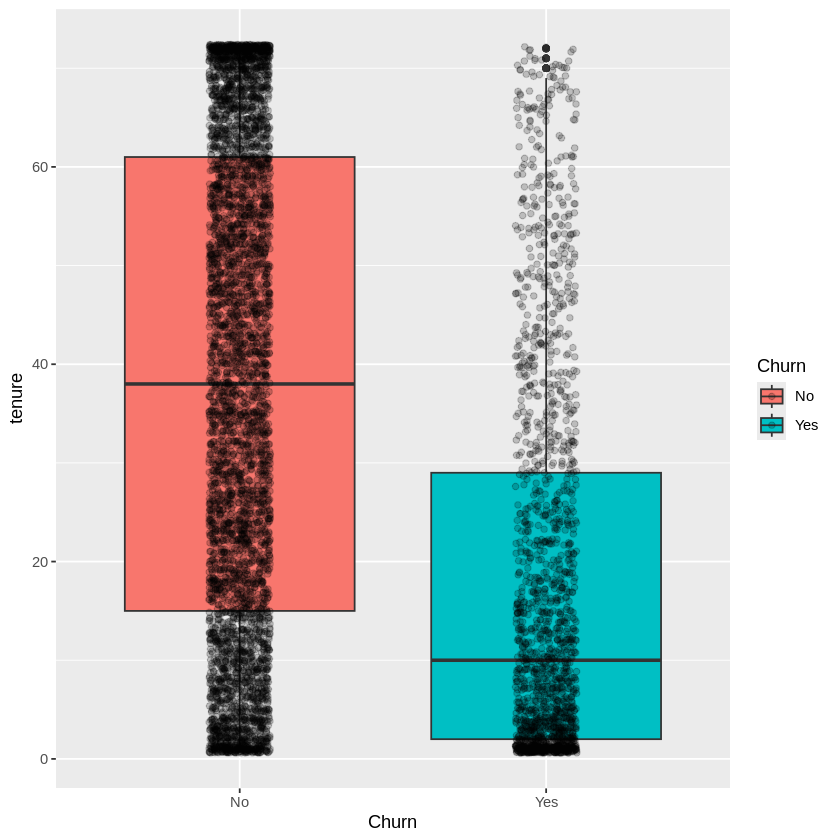

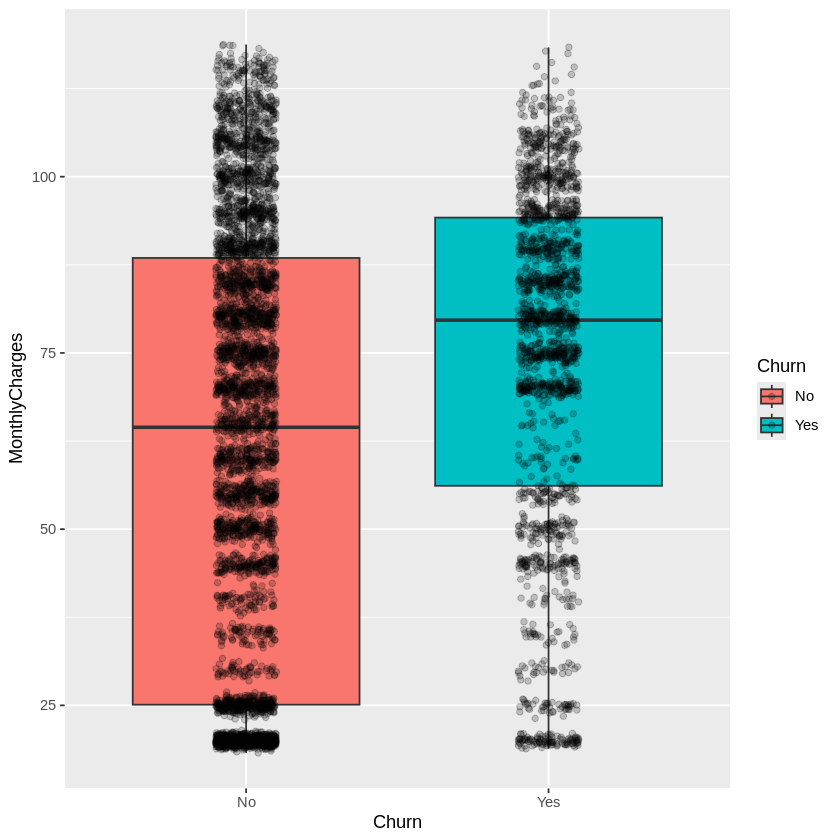

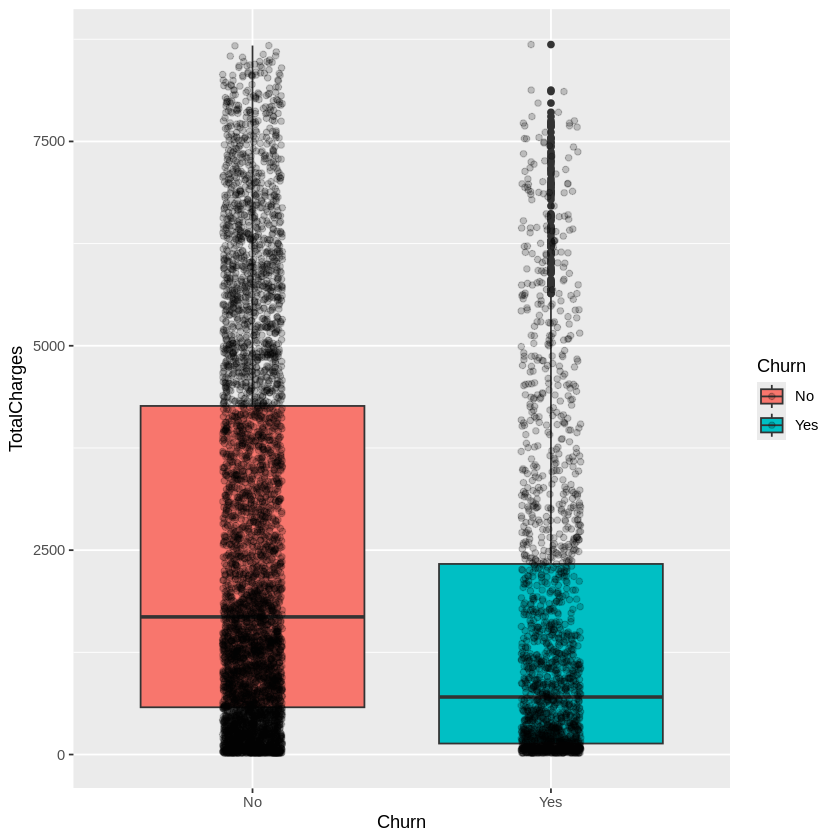

In [ ]:
#outliers - visualizar a dispersão dos dados via boxplot
dados_1 %>%
  ggplot(aes(x=Churn, y=tenure, fill=Churn)) +
    geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)

dados_1 %>%
  ggplot(aes(x=Churn, y= MonthlyCharges, fill = Churn)) +
    geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)

dados_1 %>%
  ggplot(aes(x=Churn, y=TotalCharges, fill =Churn)) +
    geom_boxplot() + geom_jitter(width = 0.1, alpha=0.2)

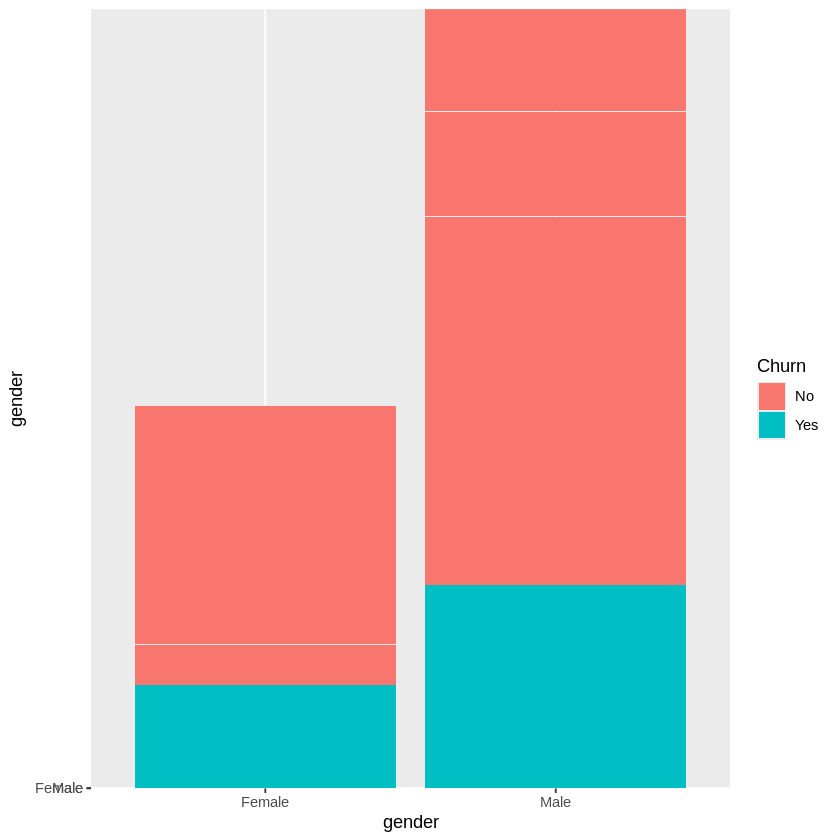

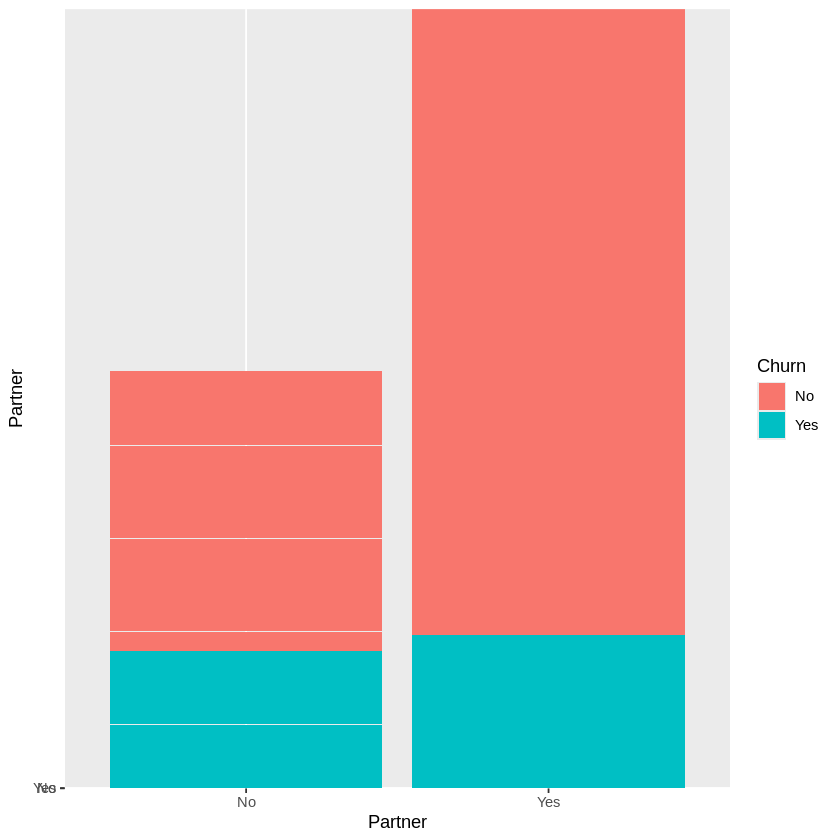

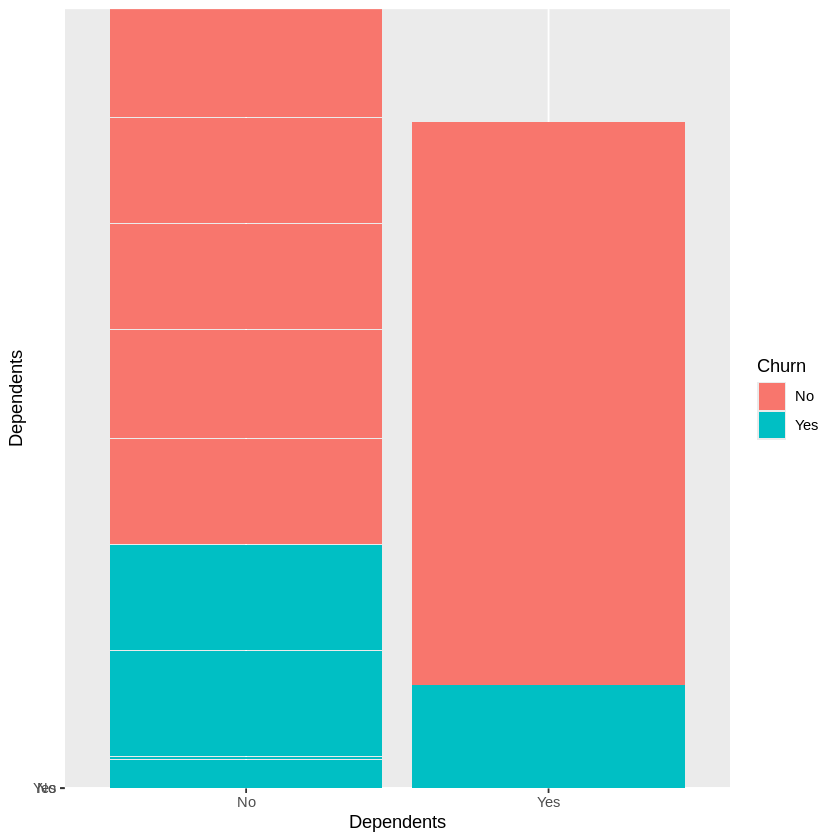

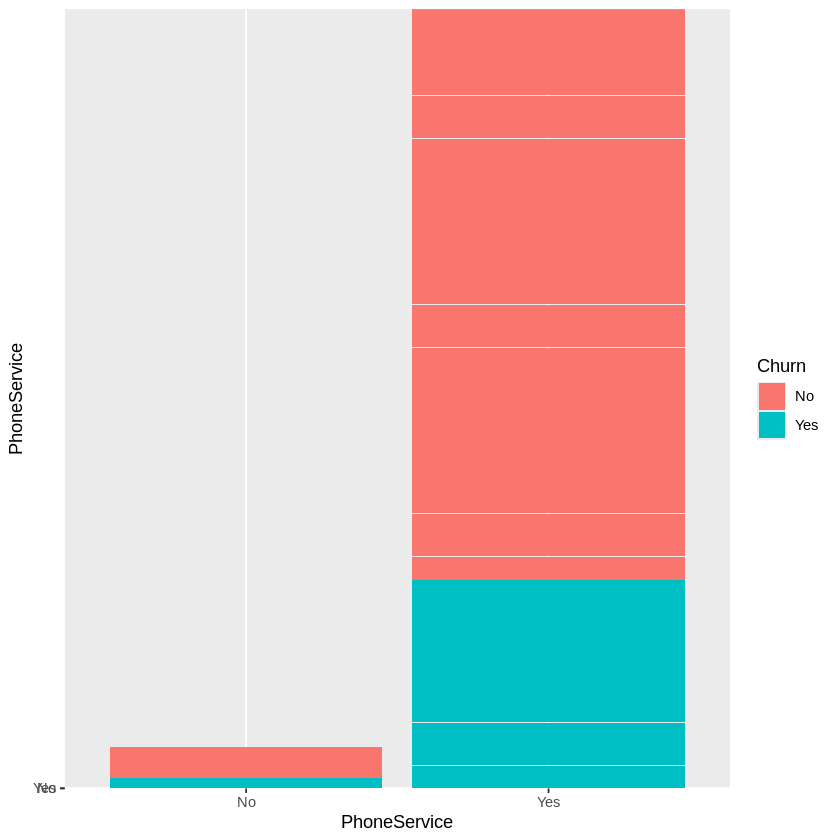

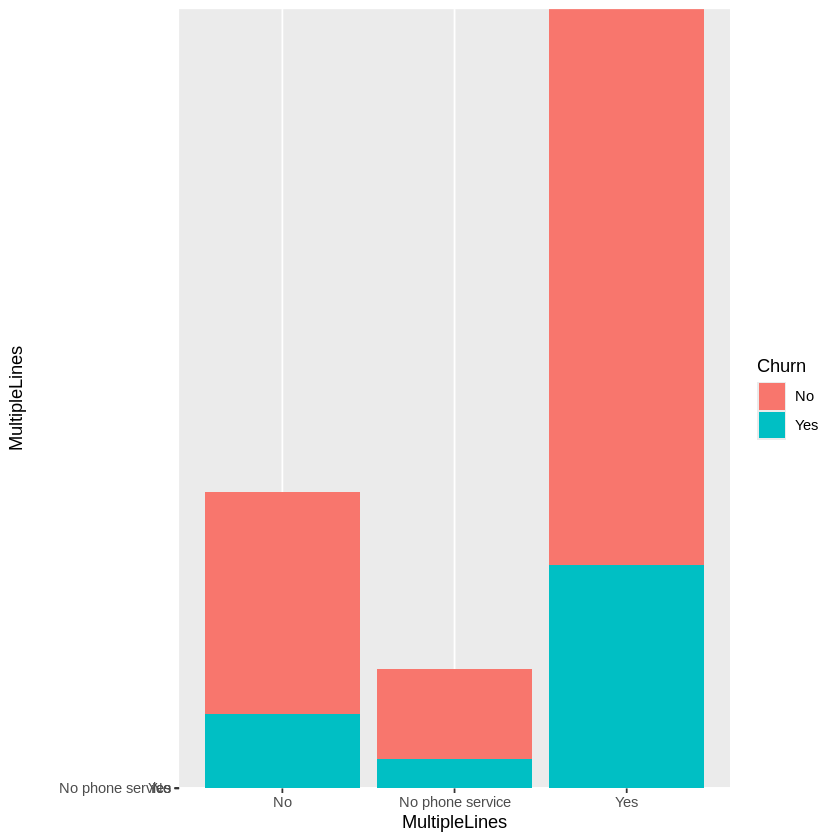

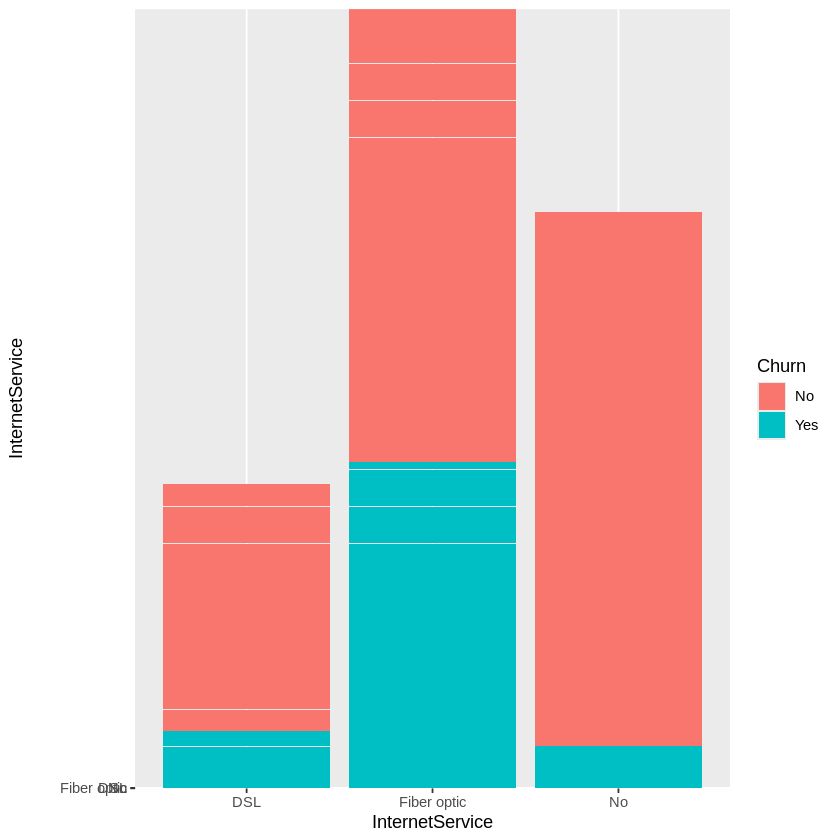

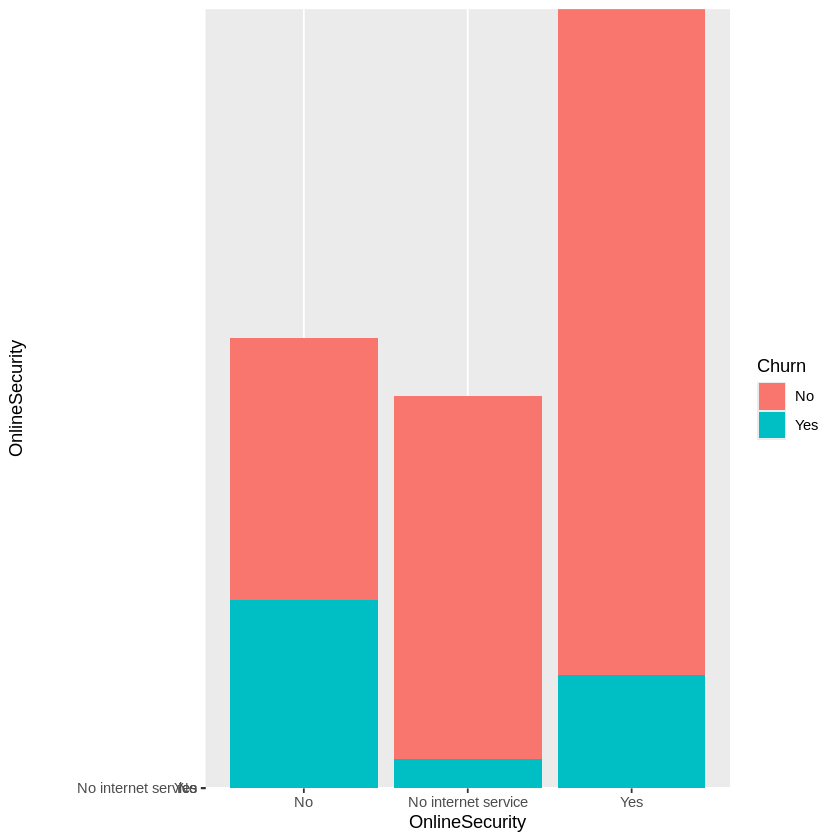

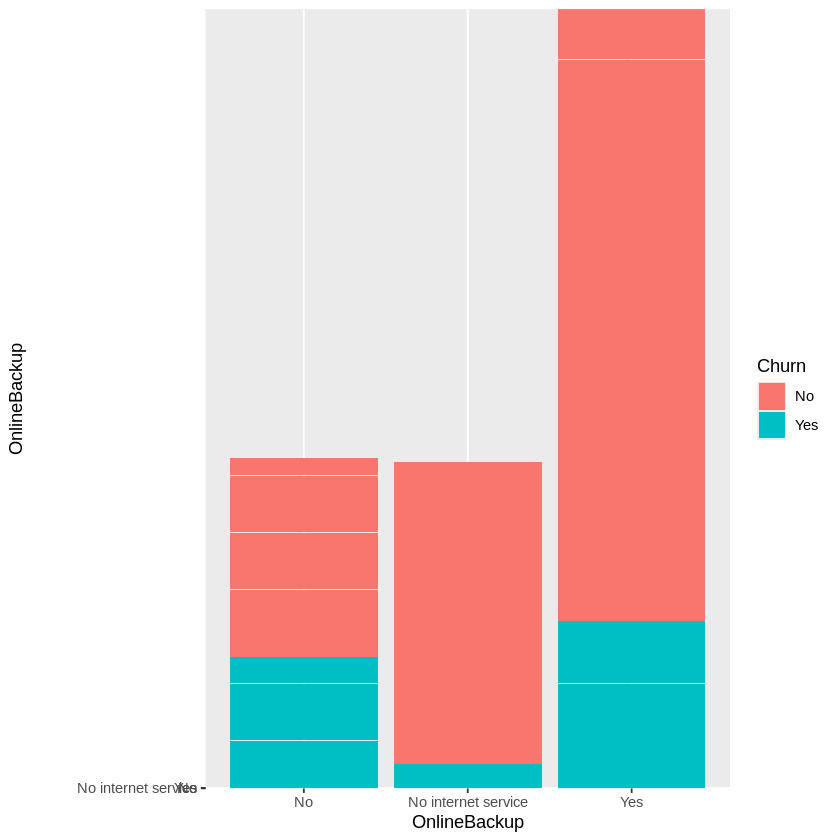

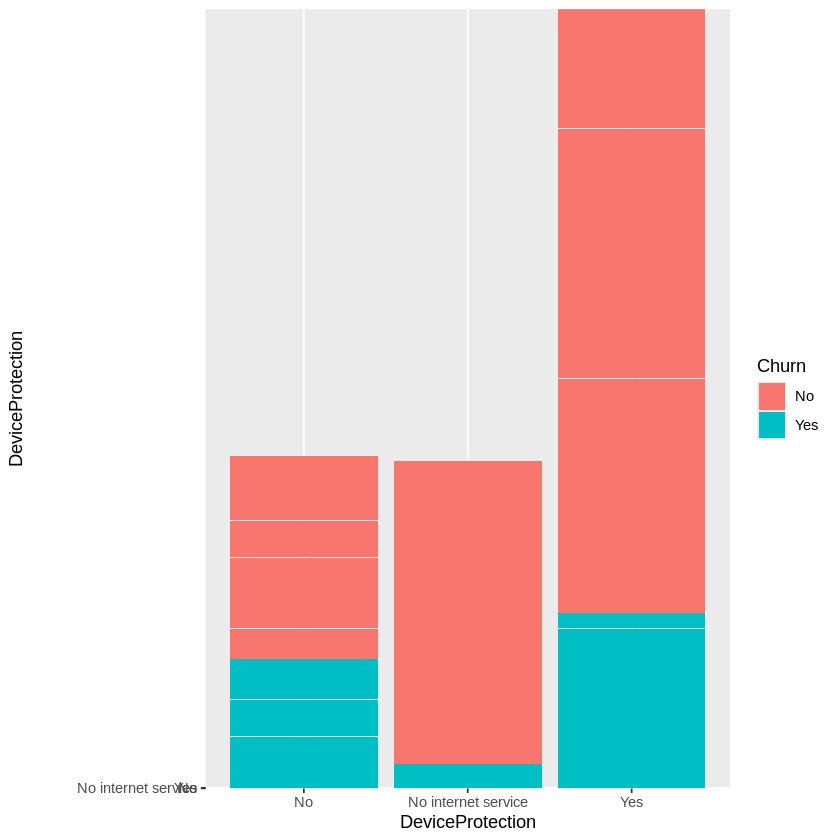

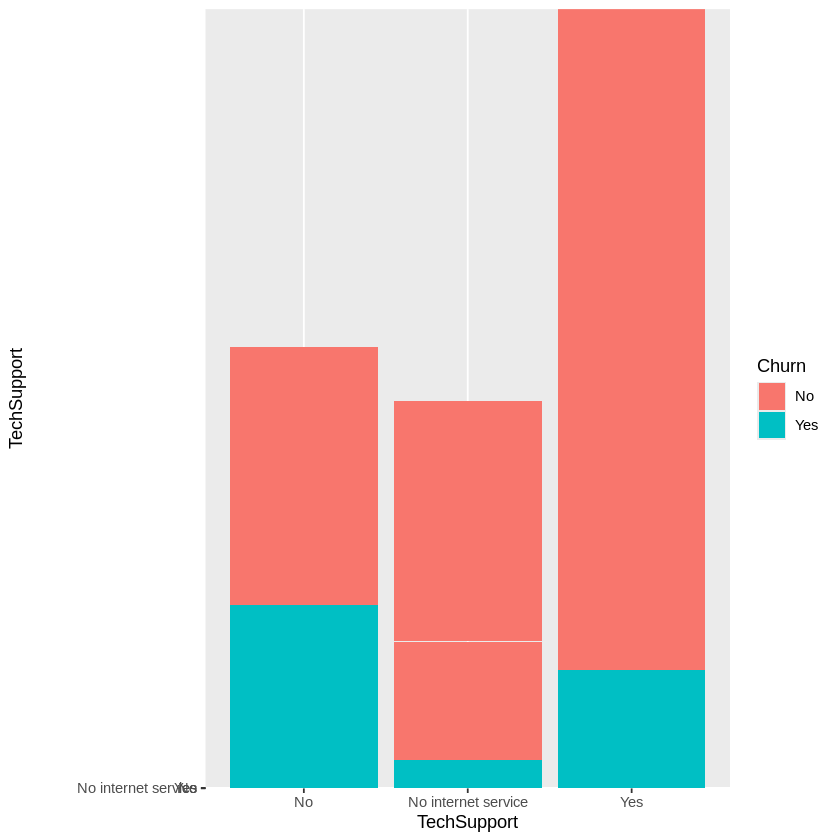

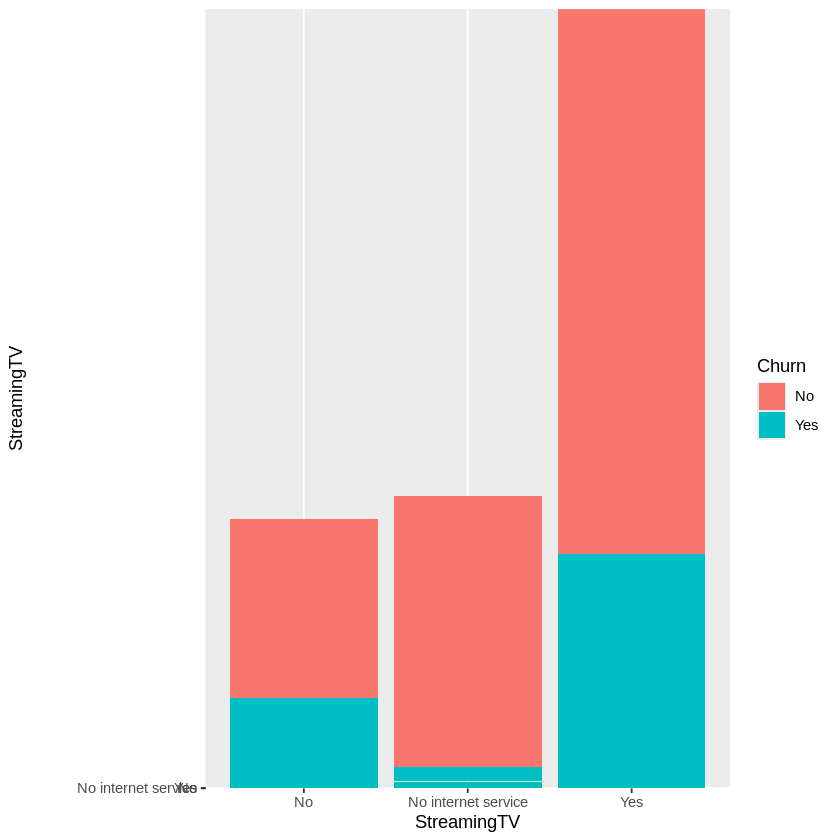

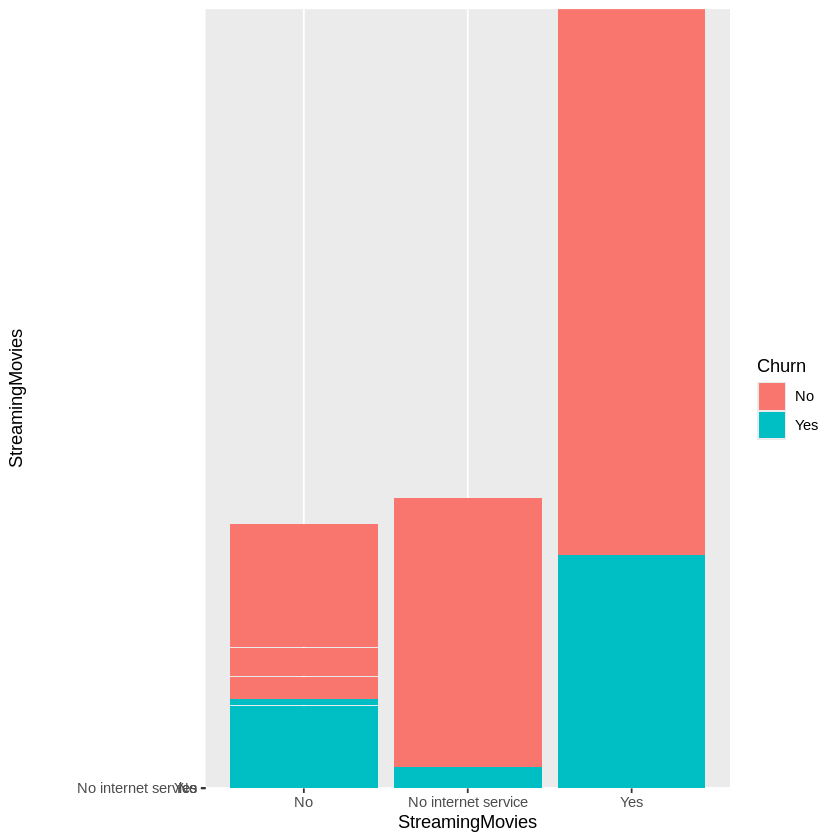

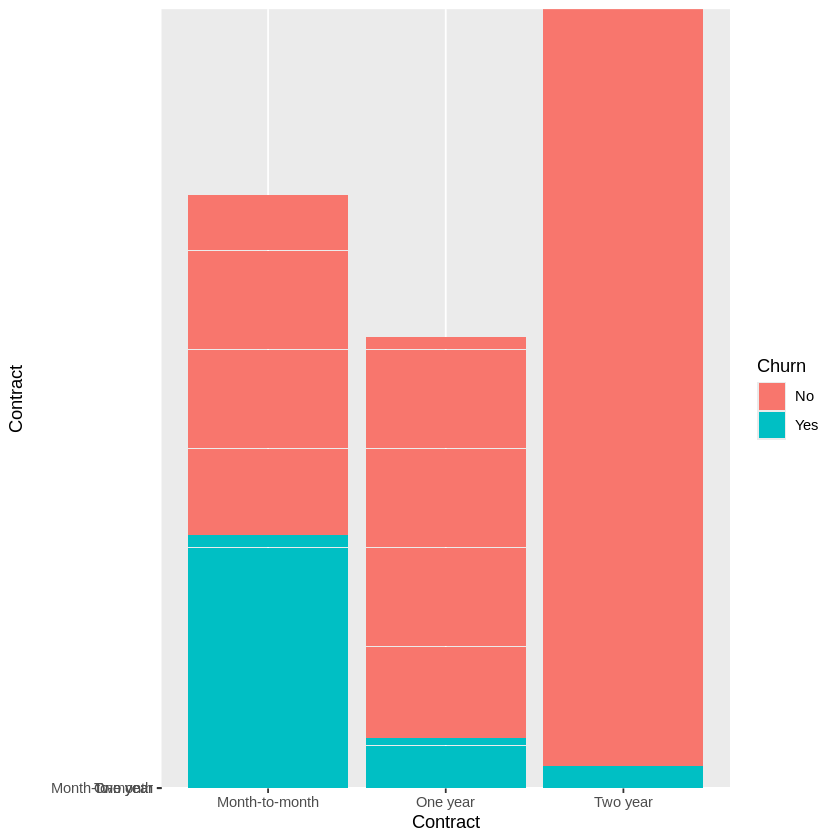

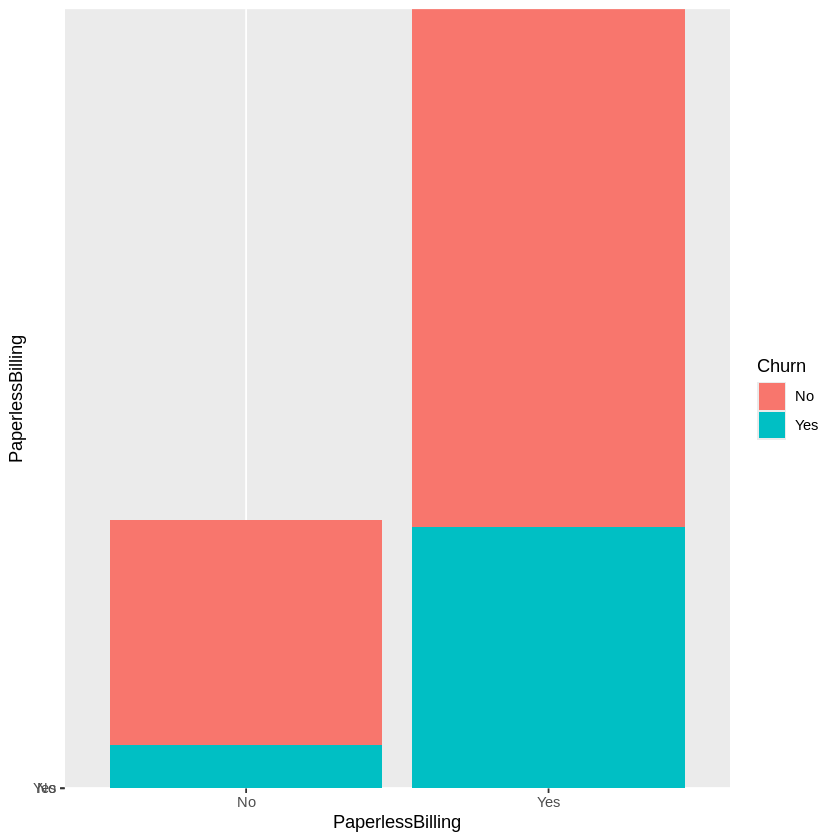

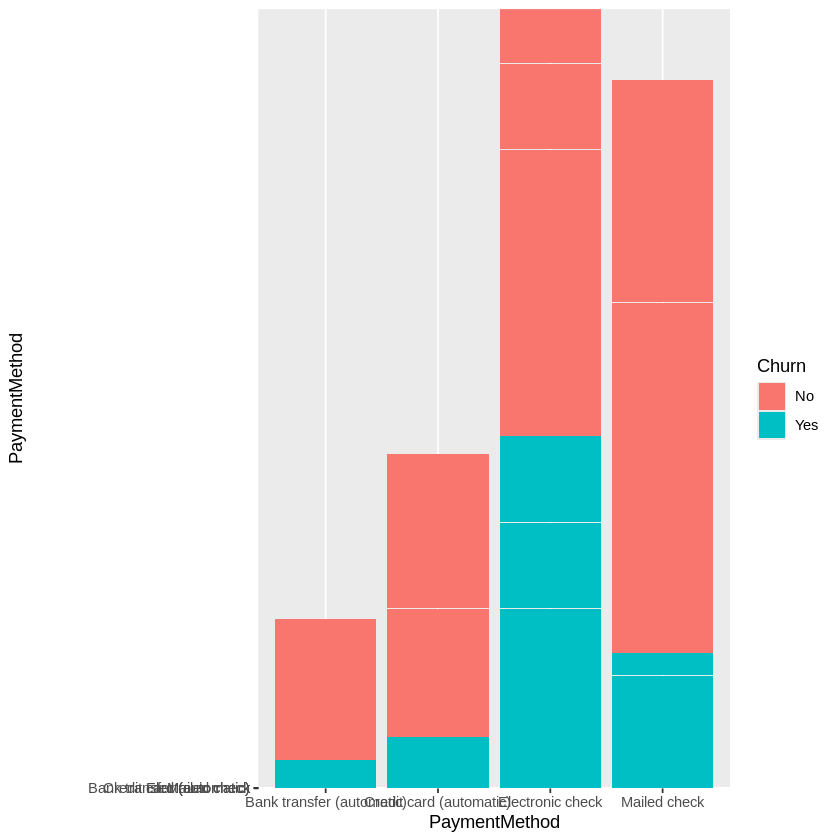

In [ ]:
# verificando a classificação de cada variável - categórica
 ggplot(dados, aes(y = gender, x = gender, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Partner, x = Partner, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Dependents, x = Dependents, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PhoneService, x = PhoneService, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = MultipleLines, x = MultipleLines, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = InternetService, x = InternetService, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = OnlineSecurity, x = OnlineSecurity, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = OnlineBackup, x = OnlineBackup, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = DeviceProtection, x = DeviceProtection, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = TechSupport, x = TechSupport, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = StreamingTV, x = StreamingTV, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = StreamingMovies, x = StreamingMovies, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Contract, x = Contract, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PaperlessBilling, x = PaperlessBilling, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PaymentMethod, x = PaymentMethod, fill = Churn)) + geom_bar(stat = "identity")


In [ ]:
# verificando a classificação de cada variavel - númerica

ggplot(dados,
        aes(x = MonthlyCharges, fill = Churn)) +
        geom_density(alpha = 0.4) +
        labs(title = "")

ggplot(dados,
        aes(x = TotalCharges, fill = Churn)) +
        geom_density(alpha = 0.4) +
          labs(title = "")

ggplot(dados,
        aes(x = SeniorCitizen, fill = Churn)) +
        geom_density(alpha = 0.4) +
        labs(title = "")

In [ ]:
# transformação de dados (qualitativo para quantitativo) - variaveis binarias
dados_quant <- dados_1
colnames (dados_quant)
dados_quant %>%
  mutate(customerID = NULL,
          PhoneService = as.factor(ifelse(PhoneService == "Yes", 1,0)),
          Partner = as.factor(ifelse(Partner == "Yes", 1,0)),
          Dependents = as.factor(ifelse(Dependents == "Yes", 1,0)),
          PaperlessBilling = as.factor(ifelse(PaperlessBilling == "Yes",1, 0)),
          Churn = as.factor(ifelse(Churn == "Yes", 1,0))
          ) -> dados_quant
glimpse(dados_quant)

In [ ]:
#utilização de varivaies dummy
dummy_dados <- dados_quant %>%
  select(InternetService, Contract, PaymentMethod, MultipleLines,
          OnlineBackup, OnlineSecurity, DeviceProtection, StreamingTV,
          StreamingMovies, TechSupport)

dummy <- dummyVars(~., data = dummy_dados, fullRank =  T)

dummy_dados <- predict(dummy, dummy_dados)
dados_quant1 <- bind_cols(dados_quant, dummy_dados)

#removendo espaços
dados_quant1 %>%
  rename( InternetService.Fiberoptic = `InternetService.Fiber optic`,
          Contract.Oneyear = `Contract.One year`,
          Contract.Twoyear = `Contract.Two year`,
          PaymentMethod.Creditcard = `PaymentMethod.Credit card (automatic)`,
          PaymentMethod.Electronic = `PaymentMethod.Electronic check`,
          PaymentMethod.Mailed = `PaymentMethod.Mailed check`,
          MultipleLines.NoService = `MultipleLines.No phone service`,
          OnlineBackup.NoService = `OnlineBackup.No internet service` ,
          OnlineSecurity.NoService = `OnlineSecurity.No internet service`,
          DeviceProtection.NoService = `DeviceProtection.No internet service`,
          StreamingTV.NoService = `StreamingTV.No internet service`,
          StreamingMovies.NoService = `StreamingMovies.No internet service`,
          TechSupport.NoService = `TechSupport.No internet service`) -> dados_quant1


In [ ]:
# exclusão de variaveis qualitativas
dados_quant1 %>%
  mutate( gender = NULL,
          InternetService = NULL,
          Contract = NULL,
          PaymentMethod = NULL,
          OnlineBackup = NULL,
          OnlineSecurity = NULL,
          StreamingMovies = NULL,
          StreamingTV = NULL,
          MultipleLines = NULL,
          DeviceProtection = NULL,
          TechSupport = NULL) -> dados_quant1

In [ ]:
glimpse(dados_quant1)

In [ ]:
#Correlaçao dos dados
# todas que estão com fatores <fct> transformar para numérico
dados_quant1 %>%
  mutate( Partner = as.numeric(Partner),
          Dependents = as.numeric(Dependents),
          PhoneService = as.numeric(PhoneService),
          PaperlessBilling = as.numeric(PaperlessBilling),
          Churn = as.numeric(Churn)) -> dados_num
glimpse(dados_num)

In [ ]:
corrplot(cor(dados_num), order = "hclust",method = "circle")

In [ ]:
#retirando as variaveis altamente correlacionadas

dados_num %>%
 mutate(StreamingMovies.NoService=NULL,
 StreamingTV.NoService=NULL,
 DeviceProtection.NoService=NULL,
 OnlineSecurity.NoService=NULL,
 InternetService.No=NULL,
 OnlineBackup.NoService=NULL)-> dados_num

## Preparando o modelo: Balanceamento da base

In [ ]:
dados_quant1 %>%
 select(Churn) %>%
 group_by(Churn) %>%
 summarise(n = n())

 dados_quant1 %>%
   filter(Churn == 0) %>%
   sample_n(1869)-> dados_quant_0

 dados_quant1 %>%
   filter(Churn == 1)-> dados_quant_1
 dados_quant_balanc <- bind_rows(dados_quant_0,dados_quant_1)

 dados_num %>%
   select(Churn) %>%
   group_by(Churn) %>%
   summarise(n = n())

 dados_num %>%
   mutate(Churn = ifelse(Churn == 1,0,1)) %>%
   filter(Churn == 0) %>%
   sample_n(1869)-> dados_num_0

 dados_num %>%
   mutate(Churn = ifelse(Churn == 1,0,1)) %>%
   filter(Churn == 1)-> dados_num_2

 dados_num_balanc <- bind_rows(dados_num_2,dados_num_0)

 dados_num_balanc %>%
   select(Churn) %>%
   group_by(Churn) %>%
   summarise(n = n())

 dados_quant_balanc %>%
   select(Churn) %>%
   group_by(Churn) %>%
   summarise(n = n())

In [ ]:
#stepwise
#verificar quais as variaveis agregam ao modelo

modelo_teste1 <- glm(data = dados_num_balanc, Churn ~ ., family=binomial)
step(modelo_teste1)
summary(modelo_teste1)

##Validação cruzada- avalia a capacidade de generalização do modelo.

O método de validação cruzada denominado k-fold consiste em dividir o conjunto
total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e,
a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são
utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo.

Este processo é realizado k vezes alternando de forma circular o subconjunto de teste.

In [ ]:
trainIndex <- createDataPartition(dados_num_balanc$Churn, p = .8, #80%
                                    list = FALSE,
                                    times = 1)

vivoTrain <- dados_num_balanc[ trainIndex,]
vivoTest  <- dados_num_balanc[-trainIndex,]

## Regressão Logistica

In [ ]:
# treinando o modelo
set.seed(150)

glm_model = train(Churn ~ SeniorCitizen + tenure + PaperlessBilling +
                  MonthlyCharges + TotalCharges + InternetService.Fiberoptic +
                  Contract.Oneyear + Contract.Twoyear + PaymentMethod.Electronic +
                  MultipleLines.Yes + OnlineSecurity.Yes + StreamingTV.Yes +
                  StreamingMovies.Yes + TechSupport.NoService + Dependents,
                  method= "glm",
                  trControl = trainControl(method = "cv"),
                  family = "binomial",
                  data= vivoTrain,
                  )

summary(glm_model)
varImp(glm_model)

In [ ]:
#Testando a base

reg_log_pred <- predict(glm_model,vivoTrain)
reg_log_pred1 <- data.frame(reg_log_pred)
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred >= 0.5,1,0))
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred == 1,"evadido","cliente"))

vivoTrain$Churn <- as.factor(vivoTrain$Churn)
vivoTrain$Churn <- as.factor(ifelse(vivoTrain$Churn == 1,"evadido","cliente"))

glimpse(reg_log_pred1)

matrix_reg <-
confusionMatrix(data = reg_log_pred1$reg_log_pred, reference = vivoTrain$Churn, positive = "evadido")
 matrix_reg$table

 metricas <- data.frame(matrix_reg$byClass)


In [ ]:
metricas

# Árvore de decisão

In [ ]:
glimpse(dados_1)

In [ ]:
#excluindo o ID do cliente
#transformar em qualitativas as quantitativas
#adicionar classe as variaveis numericas

dados_1 %>%
  mutate(SeniorCitizen = as.factor(ifelse(SeniorCitizen == 1, "Yes", "No")),
          customerID = NULL) -> dados_quali

In [ ]:
#criando classes para as variaveis quantitativas
 tenure <- summary(dados_quali$tenure)
 tenure

In [ ]:
TotalCharges <- summary(dados_quali$TotalCharges)

min_TotalCharges <- TotalCharges[[1]]-5
q1_TotalCharges <- TotalCharges[[2]]
q2_TotalCharges <- TotalCharges[[3]]
q3_TotalCharges <- TotalCharges[[5]]
max_TotalCharges <- TotalCharges[[6]]+5

dados_quali %>%
  mutate(TotalCharges = cut(TotalCharges, breaks = c(min_TotalCharges,
                            q1_TotalCharges,
                            q2_TotalCharges,
                            q3_TotalCharges,
                            max_TotalCharges)))-> dados_quali

 summary(dados_quali$TotalCharges)

In [ ]:
#balanceamento da base
glimpse(dados_quali)
dados_quali %>%
   select(Churn) %>%
   group_by(Churn) %>%
   summarise(n = n())

dados_quali %>%
   filter(Churn == "No") %>%
   sample_n(1869)-> dados_quali_no

dados_quali %>%
   filter(Churn == "Yes")-> dados_quali_yes

dados_quali_balanc <- bind_rows(dados_quali_no,dados_quali_yes)

dados_quali_balanc %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

In [ ]:
# #separação da base para teste e treino
 trainIndex_quali <- createDataPartition(dados_quali_balanc$Churn, p = .8,
                                        list = FALSE,
                                        times = 1)

 vivoTrain_quali <- dados_quali_balanc[ trainIndex_quali,]
 vivoTest_quali <- dados_quali_balanc[-trainIndex_quali,]

In [ ]:
#treinando o modelo de árvore de decisão
 vivo.tree = train(Churn ~ .,
                  data= vivoTrain_quali,
                  method="rpart",
                  trControl = trainControl(method = "cv"))

In [ ]:
vivo.tree

In [ ]:
#instalando pacotes necessarios
install.packages("rpart.plot")
install.packages("rattle")

In [ ]:
library(rpart)
library(rattle)

In [ ]:
fancyRpartPlot(vivo.tree$finalModel)

In [ ]:
#testando a base
vivo.pred = predict(vivo.tree, newdata = vivoTrain_quali)


In [ ]:
matrix_tree <- confusionMatrix(data = vivo.pred, reference = vivoTrain_quali$Churn, positive = "Yes")
 matrix_tree$table

In [ ]:
 metricas_tree <- data.frame(matrix_tree$byClass)
 metricas_tree